# Assignment 3 - KNN

In [77]:
# Importing the required APIs 

import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

%matplotlib inline

In [47]:
#Setting Maximum displayed rows and columns and Maximum display width and height

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', 199)

#Loaded data of Iris.csv is stored as Iris_df
#index_col is used to initialise Id column as the index

Iris_df = pd.read_csv("Iris.csv", index_col="Id")

#Loading done



# Iris Flower Dataset

## Checking for duplicated records

We are going to use the duplicated() function to check for duplicate records. This function searches from top down and shows true for any record that has a duplicate above it.

In [ ]:
#Duplicate Check using .duplicated()

print(Iris_df.duplicated())

# All rows where boolean value is true signify duplicate records

In [49]:
# Print Head as a check
print(len(Iris_df))
print(Iris_df.head())
print()

# Checking for Mean values
print(Iris_df.describe())


150
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.3

## Zero Check and Resoulution

In [50]:
# Selecting columns that we don't want to be zero
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# print(columns)

for x in columns:
    Iris_df[x] = Iris_df[x].replace(0, np.NAN)
    mean = int(Iris_df[x].mean(skipna=True))
    Iris_df[x] = Iris_df[x].replace(np.NAN, mean)


# Checking for Mean values - no change indicates no zero values
print(Iris_df.describe())


       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


## Test Train Split

In [51]:
# Splitting the data 
features = Iris_df.iloc[:, 0:4]         #   All features except target feature - X
target = Iris_df.iloc[:,4]              #   Only Target feature - y

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0, test_size=0.2, train_size=0.7)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(X_test))



105
30
105
30


## Normalizing

In [52]:
# Scaling the data

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## KNN Model using Scikit Learn

In [53]:
# Accuracy Measurements for different K values
number_of_neighbors = [1, 2, 3, 4, 5, 6]
accuracy = []

for k in number_of_neighbors :

    # Defining the Model
    classifier = KNeighborsClassifier(n_neighbors=k, p=2, metric="euclidean")

    # Fitting the model
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    accuracy.append(accuracy_score(y_test, y_pred))

# print(accuracy)

### Accuracy Vs K

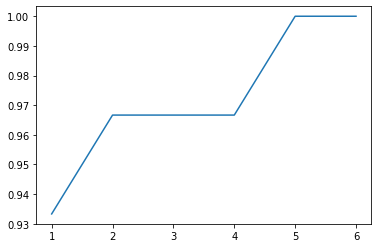

In [54]:
#Plotting Accuracy Vs K
plt.plot(number_of_neighbors, accuracy)
plt.show()

Due to the size of the dataset and consistency of the data in it, the accuracy score is considerably high for even K value equal to 1. As we increase the K value, we see an increase in the accuracy.

From the numbers 1 - 6, both 5 and 6 gave an accuracy of 100%. Just based on accuracy score I will choose 5 as desired number of neighbors because it would cost less time in calculation compared to 6 and also because it is an odd number.

In [60]:
# Defining the Model
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric="euclidean")

# Fitting the model
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Evaluation
# acc = accuracy_score(y_test, y_pred)
# cm = confusion_matrix(y_test, y_pred)
# f_one = f1_score(y_test, y_pred)

print("Accuracy Score : " + str(accuracy_score(y_test, y_pred) * 100) + "%")
print()
print("Confusion Matrix : ")
print(confusion_matrix(y_test, y_pred))
print()
print("F1 Score : ")
print(f1_score(y_test, y_pred, average="macro"))


Accuracy Score : 100.0%

Confusion Matrix : 
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

F1 Score : 
1.0


# Breast Cancer Prediction using K Nearest Neighbor

In [102]:
#Loaded data of Iris.csv is stored as Iris_df
#index_col is used to initialise Id column as the index

Cancer_df = pd.read_csv("Breast_Cancer.csv")

Cancer_df = Cancer_df.iloc[:, 1:29]

#Loading done

In [98]:
# Checking if Data loaded
print(len(Cancer_df))

569


In [103]:
Cancer_df.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst
0,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119


## Zero Check and Duplicate Check

In [104]:
# Duplicate Check
Cancer_df.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [119]:
# Checking for pre-existing non null objects
Cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
 11  radius_se               569 non-null    float64
 12  texture_se              569 non-null    float64
 13  perimeter_se            569 non-null    float64
 14  area_se                 569 non-null    fl

In [118]:
# Checking for Mean values
Cancer_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000


In [ ]:
# For each Column in Cancer Dataframe perform zero check for the numberered attributes
for column in Cancer_df:

    # Avoid Diagonosis as its is the target feature and also because it is a character
    if(column == 'diagnosis') :
        continue

    Cancer_df[column] = Cancer_df[column].replace(0, np.NAN)
    mean = int(Cancer_df[column].mean(skipna=True))
    Cancer_df[column] = Cancer_df[column].replace(np.NAN, mean)


# Checking for Mean values again - no change indicates no zero values
Cancer_df.describe()

## Euclidean Distance

In [208]:
# Function defining Euclidean Distance Calculation
def EuclideanDistance(value1, value2) :

    # print("In the function")

    i = 0
    sum = 0
    
    if(len(value1) == len(value2)) :
        # print("In the if condition")

        while(i < len(value1)) :
            # print("In the loop")
            # print(len(value1))

            sum += (value1[i] - value2[i]) * (value1[i] - value2[i])
            i += 1
    else:
        print("Incorrect Arguments")

    # print(sum)
    sq_sum = math.sqrt(sum)

    return sq_sum
    

In [134]:
#Temp
Cancer_df_new = Cancer_df.iloc[:,1:29]
cancer_list = Cancer_df_new.values.tolist()
v1 = cancer_list[0]
v2 = cancer_list[1]

print(len(cancer_list))
# print(cancer_list)
print(len(v1))
# print(v1)
# print(v2)

sum = EuclideanDistance(value1=v1, value2=v2)

sum

569
27
116779.53057195192


341.73020143375084

## Data Exploration

As mentioned we will take **Diagnosis** as our target variable. We have already checked for missing values and have performed operations to fill in these values. For outliers we will calculate Z-score, which basically denotes all values grater than **(mean + 3 * standard_deviation)** or less than **(mean - 3 * standard_deviation)**

In [2]:
#Outlier Check

Cancer_df_new = Cancer_df.iloc[:,1:29]

df_mean = Cancer_df_new.mean(axis = 0)
df_std = Cancer_df_new.std(axis = 0)

indexes = []

# print(df_mean)
# print(df_std)

for column in Cancer_df_new:
    # print(column)
    # print()
    z=0
    for i in Cancer_df_new[column] :
        if(i >= df_mean[column] + (df_std[column] * 3) or i <= df_mean[column] - (df_std[column] * 3)) :
            if z not in indexes:
                indexes.append(z)
        z+=1
        
    # print()

Cancer_df_outliers_deleted = Cancer_df

for i in indexes:
    Cancer_df_outliers_deleted = Cancer_df_outliers_deleted.drop(i)

Cancer_df_outliers_deleted.head()


NameError: name 'Cancer_df' is not defined

After deleting the outliers our dataset size is 499

## Attribute Corelation
<p>Most Attributes in this dataset represent the same value for example for radius there are 3 fields, Mean Radius, Radius SE and Worst Radius. I didn't want to lose any information by grouping these columns together or eliminating them. Relations between them will most probably be directly proportional</p>

<p>There are attributes that are a combination of others like smoothness (local variation in radius lengths) or compactness (perimeter² / area — 1.0). We will try to avoid obvious corelation and look at correlation between attributes that are vaguely related</p>

In [356]:
Data_df = Cancer_df_outliers_deleted.head(500)

## Scatter Plots

### Texture vs Smoothness 

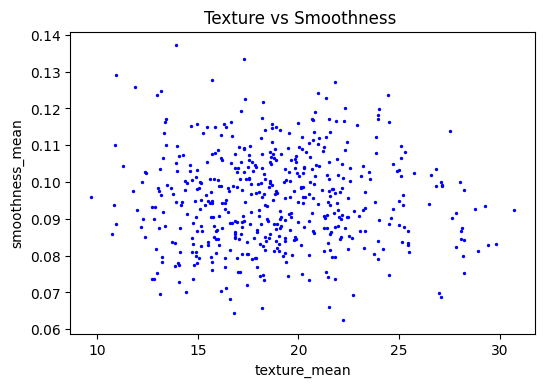

In [379]:
plt.figure(dpi=100)
x = Data_df['texture_mean'].to_list()
y1 = Data_df['smoothness_mean'].to_list()

plt.scatter(x, y1, color='b', s=2)

plt.title("Texture vs Smoothness ")
plt.xlabel("texture_mean")
plt.ylabel('smoothness_mean')
# plt.legend()
plt.show()

### Compactness Vs Concavity

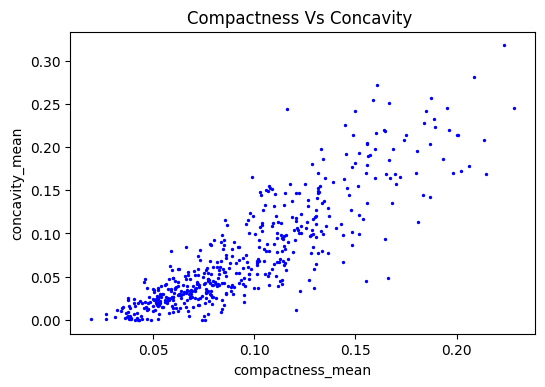

In [380]:
plt.figure(dpi=100)
x = Data_df['compactness_mean'].to_list()
y1 = Data_df['concavity_mean'].to_list()

plt.scatter(x, y1, color='b', s=2)

plt.title("Compactness Vs Concavity ")
plt.xlabel("compactness_mean")
plt.ylabel('concavity_mean')
# plt.legend()
plt.show()

Compactness and Concavity are almost linearly related

### Perimeter vs Symmetry

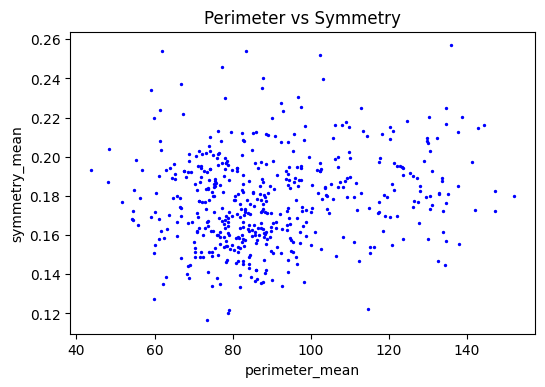

In [381]:
plt.figure(dpi=100)
x = Data_df['perimeter_mean'].to_list()
y1 = Data_df['symmetry_mean'].to_list()

plt.scatter(x, y1, color='b', s=2)

plt.title("Perimeter vs Symmetry")
plt.xlabel("perimeter_mean")
plt.ylabel('symmetry_mean')
# plt.legend()
plt.show()

## Train - Test Split

In [299]:
Cancer_df_outliers_deleted_duplicate = Cancer_df_outliers_deleted.head(500)

# Load_data_test_df - test data
# Sampled using sample function from pandas
# frac = 0.2 provides data that is 20 % of total dataset
# Printing shape to confirm sizes
Cancer_data_test_df = Cancer_df_outliers_deleted_duplicate.sample(frac = 0.20)
# print(Cancer_data_test_df.head(3))
print("Cancer_data_test_df shape")
print(Cancer_data_test_df.shape)

# Cancer_data_train_df - training data
# Equating it to total data set
Cancer_data_train_df = Cancer_df_outliers_deleted_duplicate;
# print(Cancer_data_train_df.head(3))
# Printing shape to confirm sizes before removal of data
print("\nCancer_data_train_df shape before removal")
print(Cancer_data_train_df.shape)

# cond - condition, checks for ID equalities between test and training data
cond = Cancer_data_train_df.index.isin(Cancer_data_test_df.index)

# Drop data from training based on condition - cond
Cancer_data_train_df.drop(Cancer_data_train_df[cond].index, inplace = True)

# Printing shape to confirm sizes after removal of data
print("\nCancer_data_train_df shape after removal")
print(Cancer_data_train_df.shape)




Cancer_data_test_df shape
(100, 28)

Cancer_data_train_df shape before removal
(499, 28)

Cancer_data_train_df shape after removal
(399, 28)


c:\Users\Administrator\Desktop\CS596_Assignments\Assignment 3\my_notebook2_ev\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Normalize (Scaling)

In [300]:
X_train = Cancer_data_train_df.iloc[:, 1:29]
X_test = Cancer_data_test_df.iloc[:,1:29]
y_train = Cancer_data_train_df.iloc[:, 0:1]
y_test = Cancer_data_test_df.iloc[:,0:1]

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(X_test))

399
100
399
100


In [301]:
# Normalizing 
# Fitting is done only using training data
# The test data is only transformed

def Normalize(X_train, X_test) :
    df_min = X_train.min(axis = 0)
    df_max = X_train.max(axis = 0)

    for column in X_train:
        # print(column)
        # print()
        for index in X_train.index :
            X_train[column][index] = (X_train[column][index] - df_min[column]) / (df_max[column] - df_min[column])
            # print (X_train[column][index])

    for column in X_test:
        # print(column)
        # print()
        for index in X_test.index :
            X_test[column][index] = (X_test[column][index] - df_min[column]) / (df_max[column] - df_min[column])
            # print (X_test[column][index])

    return(X_train, X_test)


In [302]:
X_train, X_test = Normalize(X_train=X_train, X_test=X_test)

## KNN Classifier

In [352]:
def KnnClassifier(X_train, y_train, X_test, k = 5):

    y_pred = pd.DataFrame(index=X_test.index, columns={'diagnosis'})

    for index1, row1 in X_test.iterrows():

        Distance = pd.DataFrame(index=X_train.index, columns={'Distance'})
        m = 0
        b = 0

        for index2, row2 in X_train.iterrows():
            Distance['Distance'][index2] = EuclideanDistance(row1, row2)
            Distance = Distance.sort_values(by=['Distance'])


        Distance = Distance.head(k)

        # print(Distance)

        for index3, row3 in Distance.iterrows():
            if(y_train['diagnosis'][index3] == 'B') :
                b+=1
            else :
                m+=1
        
        # print ("B - " +str(b))
        # print ("M - " +str(m))

        if(b > m) :
            y_pred['diagnosis'][index1] = 'B'
        elif (m > b) :
            y_pred['diagnosis'][index1] = 'M'
        else :
            Distance = Distance.head(1)
            for index4, row4 in Distance.iterrows():
                if(y_train['diagnosis'][index4] == 'B') :
                    y_pred['diagnosis'][index1] = 'B'
                    break
                else :
                    y_pred['diagnosis'][index1] = 'M'
                    break

    return y_pred

        

## Training and Calculating Accuracy with K as 5

In [304]:
y_pred = KnnClassifier(X_train = X_train, y_train = y_train, X_test = X_test, k = 5)

# print(y_test, y_pred)



In [305]:
# Accuracy Calculation
def CalcAccuracy(y_test, y_pred) :

    total = len(y_test)

    correct = 0

    # print(total)

    for index, row in y_test.iterrows() :
        if y_test['diagnosis'][index] == y_pred['diagnosis'][index] :
            correct += 1

    accuracy = correct / total
    return accuracy


In [306]:
accuracy = CalcAccuracy(y_test=y_test, y_pred=y_pred)

print("Accuracy : " + str(accuracy * 100) + "%")


Accuracy : 96.0%


## 5-fold Cross Validation
<p>Since the dataset size is 499, we will split the data into chunks of hundred with the last set containing 99.</p>

### Data Preparation

In [307]:
# test data will be Cancer_data_test1_df, Cancer_data_test2_df, Cancer_data_test3_df, Cancer_data_test4_df, Cancer_data_test5_df

# Cancer_data_remain_df will be the dataframe where we slowly remove slices of and transfer it to test
Cancer_data_remain_df = Cancer_df_outliers_deleted.head(500)

# print("Cancer_data_remain_df shape")
# print(Cancer_data_remain_df.shape)


Cancer_data_test1_df = Cancer_data_remain_df.head(100)


# cond - condition, checks for ID equalities between test and training data
cond = Cancer_data_remain_df.index.isin(Cancer_data_test1_df.index)
# Drop data from training based on condition - cond
Cancer_data_remain_df.drop(Cancer_data_remain_df[cond].index, inplace = True)

# print("Cancer_data_remain_df shape")
# print(Cancer_data_remain_df.shape)


Cancer_data_test2_df = Cancer_data_remain_df.head(100)


# cond - condition, checks for ID equalities between test and training data
cond = Cancer_data_remain_df.index.isin(Cancer_data_test2_df.index)
# Drop data from training based on condition - cond
Cancer_data_remain_df.drop(Cancer_data_remain_df[cond].index, inplace = True)

# print("Cancer_data_remain_df shape")
# print(Cancer_data_remain_df.shape)


Cancer_data_test3_df = Cancer_data_remain_df.head(100)


# cond - condition, checks for ID equalities between test and training data
cond = Cancer_data_remain_df.index.isin(Cancer_data_test3_df.index)
# Drop data from training based on condition - cond
Cancer_data_remain_df.drop(Cancer_data_remain_df[cond].index, inplace = True)

# print("Cancer_data_remain_df shape")
# print(Cancer_data_remain_df.shape)


Cancer_data_test4_df = Cancer_data_remain_df.head(100)


# cond - condition, checks for ID equalities between test and training data
cond = Cancer_data_remain_df.index.isin(Cancer_data_test4_df.index)
# Drop data from training based on condition - cond
Cancer_data_remain_df.drop(Cancer_data_remain_df[cond].index, inplace = True)

# print("Cancer_data_remain_df shape")
# print(Cancer_data_remain_df.shape)


Cancer_data_test5_df = Cancer_data_remain_df.head(100)


# cond - condition, checks for ID equalities between test and training data
cond = Cancer_data_remain_df.index.isin(Cancer_data_test5_df.index)
# Drop data from training based on condition - cond
Cancer_data_remain_df.drop(Cancer_data_remain_df[cond].index, inplace = True)

# print("Cancer_data_remain_df shape")
# print(Cancer_data_remain_df.shape)


print("Cancer_data_test1_df shape")
print(Cancer_data_test1_df.shape)

print("Cancer_data_test2_df shape")
print(Cancer_data_test2_df.shape)

print("Cancer_data_test3_df shape")
print(Cancer_data_test3_df.shape)

print("Cancer_data_test4_df shape")
print(Cancer_data_test4_df.shape)

print("Cancer_data_test5_df shape")
print(Cancer_data_test5_df.shape)

# print("Cancer_data_remain_df shape")
# print(Cancer_data_remain_df.shape)





Cancer_data_test1_df shape
(100, 28)
Cancer_data_test2_df shape
(100, 28)
Cancer_data_test3_df shape
(100, 28)
Cancer_data_test4_df shape
(100, 28)
Cancer_data_test5_df shape
(99, 28)


In [309]:
#########################################################

Cancer_data_train1_df = Cancer_df_outliers_deleted.head(500)

# cond - condition, checks for ID equalities between test and training data
cond = Cancer_data_train1_df.index.isin(Cancer_data_test1_df.index)
# Drop data from training based on condition - cond
Cancer_data_train1_df.drop(Cancer_data_train1_df[cond].index, inplace = True)

#########################################################

Cancer_data_train2_df = Cancer_df_outliers_deleted.head(500)

# cond - condition, checks for ID equalities between test and training data
cond = Cancer_data_train2_df.index.isin(Cancer_data_test2_df.index)
# Drop data from training based on condition - cond
Cancer_data_train2_df.drop(Cancer_data_train2_df[cond].index, inplace = True)

#########################################################

Cancer_data_train3_df = Cancer_df_outliers_deleted.head(500)

# cond - condition, checks for ID equalities between test and training data
cond = Cancer_data_train3_df.index.isin(Cancer_data_test3_df.index)
# Drop data from training based on condition - cond
Cancer_data_train3_df.drop(Cancer_data_train3_df[cond].index, inplace = True)

#########################################################

Cancer_data_train4_df = Cancer_df_outliers_deleted.head(500)

# cond - condition, checks for ID equalities between test and training data
cond = Cancer_data_train4_df.index.isin(Cancer_data_test4_df.index)
# Drop data from training based on condition - cond
Cancer_data_train4_df.drop(Cancer_data_train4_df[cond].index, inplace = True)

#########################################################

Cancer_data_train5_df = Cancer_df_outliers_deleted.head(500)

# cond - condition, checks for ID equalities between test and training data
cond = Cancer_data_train5_df.index.isin(Cancer_data_test5_df.index)
# Drop data from training based on condition - cond
Cancer_data_train5_df.drop(Cancer_data_train5_df[cond].index, inplace = True)

#########################################################

print("Cancer_data_train1_df shape")
print(Cancer_data_train1_df.shape)

print("Cancer_data_train2_df shape")
print(Cancer_data_train2_df.shape)

print("Cancer_data_train3_df shape")
print(Cancer_data_train3_df.shape)

print("Cancer_data_train4_df shape")
print(Cancer_data_train4_df.shape)

print("Cancer_data_train5_df shape")
print(Cancer_data_train5_df.shape)


Cancer_data_train1_df shape
(399, 28)
Cancer_data_train2_df shape
(399, 28)
Cancer_data_train3_df shape
(399, 28)
Cancer_data_train4_df shape
(399, 28)
Cancer_data_train5_df shape
(400, 28)


c:\Users\Administrator\Desktop\CS596_Assignments\Assignment 3\my_notebook2_ev\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [312]:
#Splitting into train - test

#########################################################

X_train1 = Cancer_data_train1_df.iloc[:, 1:29]
X_test1 = Cancer_data_test1_df.iloc[:,1:29]
y_train1 = Cancer_data_train1_df.iloc[:, 0:1]
y_test1 = Cancer_data_test1_df.iloc[:,0:1]

#########################################################
#########################################################

X_train2 = Cancer_data_train2_df.iloc[:, 1:29]
X_test2 = Cancer_data_test2_df.iloc[:,1:29]
y_train2 = Cancer_data_train2_df.iloc[:, 0:1]
y_test2 = Cancer_data_test2_df.iloc[:,0:1]

#########################################################
#########################################################

X_train3 = Cancer_data_train3_df.iloc[:, 1:29]
X_test3 = Cancer_data_test3_df.iloc[:,1:29]
y_train3 = Cancer_data_train3_df.iloc[:, 0:1]
y_test3 = Cancer_data_test3_df.iloc[:,0:1]

#########################################################
#########################################################

X_train4 = Cancer_data_train4_df.iloc[:, 1:29]
X_test4 = Cancer_data_test4_df.iloc[:,1:29]
y_train4 = Cancer_data_train4_df.iloc[:, 0:1]
y_test4 = Cancer_data_test4_df.iloc[:,0:1]

#########################################################
#########################################################

X_train5 = Cancer_data_train5_df.iloc[:, 1:29]
X_test5 = Cancer_data_test5_df.iloc[:,1:29]
y_train5 = Cancer_data_train5_df.iloc[:, 0:1]
y_test5 = Cancer_data_test5_df.iloc[:,0:1]

#########################################################

# print(len(X_train1))
# print(len(X_test1))
# print(len(y_train1))
# print(len(X_test1))

# print()

# print(len(X_train2))
# print(len(X_test2))
# print(len(y_train2))
# print(len(X_test2))

# print()

# print(len(X_train3))
# print(len(X_test3))
# print(len(y_train3))
# print(len(X_test3))

# print()

# print(len(X_train4))
# print(len(X_test4))
# print(len(y_train4))
# print(len(X_test4))

# print()

# print(len(X_train5))
# print(len(X_test5))
# print(len(y_train5))
# print(len(X_test5))


### Calculating Accuracy for different K values
<p>The accuracy at k = 5 was very high so an approriate k will be around the value of 5. For our calculation we will calculate for k = 3 to k = 9</p>

In [313]:
#Normalizing Data

X_train1, X_test1 = Normalize(X_train=X_train1, X_test=X_test1)
X_train2, X_test2 = Normalize(X_train=X_train2, X_test=X_test2)
X_train3, X_test3 = Normalize(X_train=X_train3, X_test=X_test3)
X_train4, X_test4 = Normalize(X_train=X_train4, X_test=X_test4)
X_train5, X_test5 = Normalize(X_train=X_train5, X_test=X_test5)

In [355]:
# Looping to calculate k value

k_value = [3,4,5,6,7,8,9]
# k_value = [4]
Accuracy_mean = []

for k in k_value :

    # K-means classification for each dataframe
    y_pred1 = KnnClassifier(X_train = X_train1, y_train = y_train1, X_test = X_test1, k = k)
    y_pred2 = KnnClassifier(X_train = X_train2, y_train = y_train2, X_test = X_test2, k = k)
    y_pred3 = KnnClassifier(X_train = X_train3, y_train = y_train3, X_test = X_test3, k = k)
    y_pred4 = KnnClassifier(X_train = X_train4, y_train = y_train4, X_test = X_test4, k = k)
    y_pred5 = KnnClassifier(X_train = X_train5, y_train = y_train5, X_test = X_test5, k = k)

    # Accuracy Calculation for each dataframe
    accuracy1 = CalcAccuracy(y_test=y_test1, y_pred=y_pred1)
    accuracy2 = CalcAccuracy(y_test=y_test2, y_pred=y_pred2)
    accuracy3 = CalcAccuracy(y_test=y_test3, y_pred=y_pred3)
    accuracy4 = CalcAccuracy(y_test=y_test4, y_pred=y_pred4)
    accuracy5 = CalcAccuracy(y_test=y_test5, y_pred=y_pred5)

    y_pred1 = y_pred1.iloc[0:0]
    y_pred2 = y_pred2.iloc[0:0]
    y_pred3 = y_pred3.iloc[0:0]
    y_pred4 = y_pred4.iloc[0:0]
    y_pred5 = y_pred5.iloc[0:0]

    Accuracy_mean.append((accuracy1 + accuracy2 + accuracy3 + accuracy4 + accuracy5) / 5)

    

In [357]:
Accuracy_mean

[0.961919191919192,
 0.965939393939394,
 0.9599595959595961,
 0.955919191919192,
 0.9599595959595961,
 0.963959595959596,
 0.963959595959596]

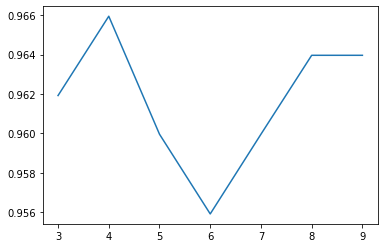

In [358]:
plt.plot(k_value, Accuracy_mean)
plt.show()

Accuracy Average of the 5 fold split vs K value graph shows an interesting trend where the accuracy reaches a spike at 4, then a small dip between 4 and 8, following which it remains constant till 9. His trend shows how the classification of this particular dataset is difficult and a 100% accuracy cannot be achieved as there is a gray are between malignant and benign cancer, where both have overlapping features

<h3>Accuracy at K equal to 5 for the initial split had an accuracy of 96% which is considerably high. Though there are concerns that this accuracy may be due to the fact that we have ignored outliers, thereby leading to chances of over-fitting, I believe that KNN in general is very sensitive to outliers and it is best to avoid them. <h3>

<h3>Talking about performance, my Knnclassifier algorithm is an exponential algorithm. The number of iterations is a greater than number of test data * number of training data. Increasing the number of columns also affects calculation of euclidean distance which in turn causes further delay <h3>

## Summary

The KnnClassifier developed in this NOTEBOOK just loops through the train data for each test data. After all Iterations are done, the y_pred values are returned which later can be compared with y-test to find accuracies.

Accuracy calculation is about the only evaluation method I used to gauge my model. After data preparation, the model provided a solid 96% for 5 nearest neighbors and upon 5 fold cross validation and checking for different k values we can observe that the model provides more than 95% accuracy on the prepped data.